# Animations avec matplotlib

Démonstration pour l'ARE DYNAMIC.

On s'intéresse à un système dynamique simple, dans lequel des humains errent dans un espace bidimensionnel par une nuit sans lune, et une meute de zombies les poursuivent. Le code utilisé est fourni dans des modules Python ci-joints, et va nous servir à démontrer des fonctionnalités d'animation basiques.

D'abord on importe les mêmes modules que d'habitude, puis on entre la commande `%matplotlib notebook` qui permet à l'animation de tourner directement dans le notebook. À cause [d'un bug dans matplotlib](https://github.com/ipython/ipython/issues/10873), sur certaines machines il est conseillé de l'entrer deux fois.

In [15]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from IPython.display import HTML
import numpy as np
%matplotlib notebook
%matplotlib notebook

Ensuite on importe notre programme si l'on utilise des modules ; ici c'est facile, tout est dans un module `main.py`. Voir aussi [des transparents d'introduction aux modules](http://webia.lip6.fr/~guillon/slides-modules.pdf).

In [2]:
import main
%load_ext autoreload
%autoreload 2

## Récupérer une liste de matrices à dessiner

Pour réaliser une animation, la première possibilité est de récupérer tous les états que l'on souhaite afficher (i.e. la matrice) dans une liste, que l'on va parcourir et afficher étape par étape. Ici c'est la variable `results` qui va contenir nos états.

In [3]:
results = main.simulation()

La variable `results` contient en particulier la matrice initiale qui nous sert de « carte » (cf. la fonction `main.simulation`), rangée à la position `0` :

In [4]:
results[0]

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  

## Une première animation

Dans notre cas, cette matrice contient initialement des `0` (qui représentent les cases vides), des `1` (les humains) et des `2` (les zombies). Pour faire une animation, on va utiliser le module `matplotlib.animation` importé plus haut. On commence par faire une `figure` avec le module `matplotlib.pyplot`, à laquelle on ajoute un champ servant à dessiner des images à partir d'une matrice, `imshow` :

<IPython.core.display.Javascript object>


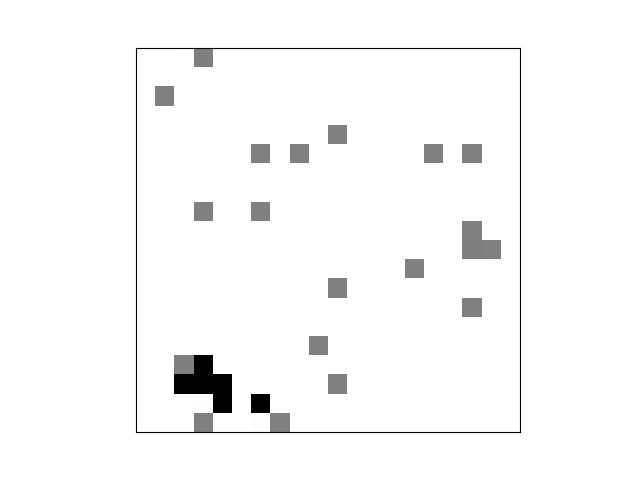

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

In [16]:
fig = plt.figure()
im=plt.imshow(results[0], interpolation = 'none', cmap = plt.cm.gray_r)
plt.xticks([]), plt.yticks([])

Toutes les étapes de notre simulation sont bien enregistrées dans la liste `results`, mais pour l'instant rien ne bouge. Pour animer notre figure, on utilise le module `animation`, plus particulièrement la fonction `FuncAnimation`. Celle-ci prend en argument, entre autres,

- la figure contenant une ou plusieurs images à animer
- une fonction de rappel servant à faire les mises-à-jour
- le temps à attendre entre deux mises-à-jour (paramètre nommé `interval`, optionnel)

La fonction de rappel, ci-dessous nommée `update`, sera appelée à chaque « tick » pour redessiner le nécessaire. Elle reçoit en premier argument le numéro de l'étape de l'animation à dessiner, et renvoie la liste des éléments qui ont été mis à jour et doivent être redessinés par la bibliothèque `matplotlib` (appelés *“artists”* dans la documentation).

Consultez la [documentation de FuncAnimation](https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html) pour plus d'informations.

In [6]:
len(results)

2701

In [7]:
def update(i):
    im.set_array(results[i])
    return [im]

ani = anim.FuncAnimation(fig, update, interval=300)
plt.show()

Dans notre cas, la mise à jour est simple : on utilise simplement l'image suivante dans la liste des résultats. Si on lance le code, on voit les zombies et les humains commencer à se déplacer. Parfois il est nécessaire de relancer le code plusieurs fois… encore un bug de `matplotlib` et/ou `jupyter` ! ☺

## Personnaliser les couleurs

Cependant, si on regarde le code d'un peu plus près, on s'aperçoit que, en plus des zombies et des humains, un troisième type d'unité existe, les « cadavres ». Dans l'animation précédente, ceux-ci sont représentés comme les zombies, en noir ; c'est dû au fait que, lorsqu'on lance l'animation, seuls trois types de cases sont dessinés. Aussi, `matplotlib` essaye d'être intelligent et choisit 3 couleurs de la charte graphique choisie (des niveaux de gris) pour représenter ces trois types de cases. Les cadavres se retrouvent donc sans couleur propre, et sont également dessinés en noir. Pouvez-vous deviner pourquoi ?

Pour remédier à ça, on peut utiliser des outils de `matplotlib` qui permettent de choisir soi-même ses couleurs. On importe la classe `ListedColormap`, qui va prendre en argument une liste de couleurs et le nombre de valeurs à piocher dedans.

On import également la classe `Normalize` qui permet de préciser les valeurs minimum et maximum que prendront les cases de la matrice, pour que `matplotlib` n'ait pas besoin de choisir les couleurs.

In [8]:
from matplotlib.colors import ListedColormap, Normalize

Les couleurs peuvent être données dans [différents formats, tels leur nom ou leur code RGB](https://matplotlib.org/api/colors_api.html). Ici on fait une liste simple des couleurs dont on a besoin, et on passe notre *colormap* personnalisée à `imshow`.

In [9]:
colors = [(1, 1, 1),           # Blanc
          (0.7, 0.7, 0.7),     # Gris (humains)
          (0.52, 0.68, 0.40),  # Vert (zombie)
          (0.68, 0.1, 0.1)]    # Rouge (cadavres)
cmap = ListedColormap(colors)

<IPython.core.display.Javascript object>


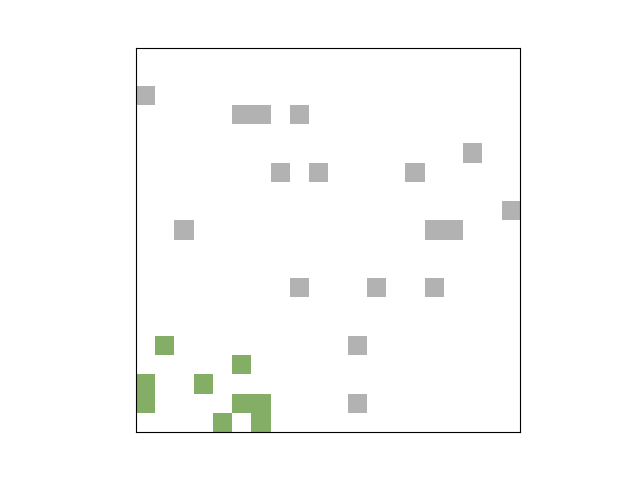

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

In [17]:
fig = plt.figure()
norm = Normalize(vmin = 0, vmax = 3, clip = False)
im=plt.imshow(results[80], interpolation = 'nearest',
              cmap = cmap,
              norm = norm)
plt.xticks([]), plt.yticks([])

In [11]:
def update(i):
    im.set_array(results[i])
    return [im]

ani = anim.FuncAnimation(fig, update, interval=300)
plt.show()

## Rajouter une légende et un titre

On commence à avoir une animation potable, mais la figure serait plus lisible avec une légende et un titre. La première peut s'ajouter en utilisant `matplotlib.patches.Patch` (merci au groupe Varicelle pour leur code).

In [18]:
import matplotlib.patches as mpatches

In [19]:
couleur_zombie = (0.52, 0.68, 0.40)
couleur_cadavre = (0.68, 0.1, 0.1)
couleur_humain = (0.7, 0.7, 0.7)
colors = ["white", couleur_humain, couleur_zombie, couleur_cadavre]
cmap = ListedColormap(colors)

patch1 = mpatches.Patch(color=couleur_zombie, label='zombie')
patch2 = mpatches.Patch(color=couleur_humain, label='humain')
patch3 = mpatches.Patch(color=couleur_cadavre, label='cadavre')

On utilise ensuite `plt.legend` pour placer la légende. Le placement peut être un peu difficile…

<IPython.core.display.Javascript object>


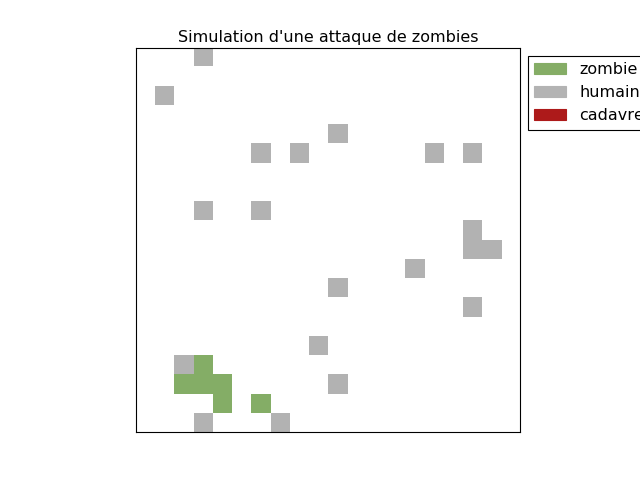

In [23]:
fig = plt.figure()
norm = Normalize(vmin = 0, vmax = 3, clip = False)
im=plt.imshow(results[0], interpolation = 'nearest',
              cmap = cmap,
              norm = norm)
plt.xticks([]), plt.yticks([])
plt.title("Simulation d'une attaque de zombies")
plt.legend(handles=[patch1, patch2, patch3],bbox_to_anchor=(1, 1, 0., 0), loc="upper left")

Le code pour lancer l'animation est toujours le même.

In [21]:
def update(i):
    im.set_array(results[i])
    return [im]

ani = anim.FuncAnimation(fig, update, interval=300)
plt.show()

Cependant, si la fonction `main.step` avait renvoyé exactement une nouvelle matrice à afficher à chaque fois (plutôt qu'une liste de plusieurs nouvelles matrices), on aurait aussi pu se passer de la liste `results` et directement écrire quelque chose comme :

In [22]:
def update(_i, *args):
    ancienne_matrice, unites = args
    nouvelle_matrice = main.step(ancienne_matrice, unites)
    # Ne fonctionne pas bien ici parce que step renvoie une liste de matrices !
    im.set_array(nouvelle_matrice[0])
    return [im]

matrice_initiale, unites = main.init()
ani = anim.FuncAnimation(fig, update, interval=300, fargs=(matrice_initiale, unites))

plt.show()